In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
df = pd.read_csv("sensor_log-6.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# **Acceleration Sensor**

## Before Filtering

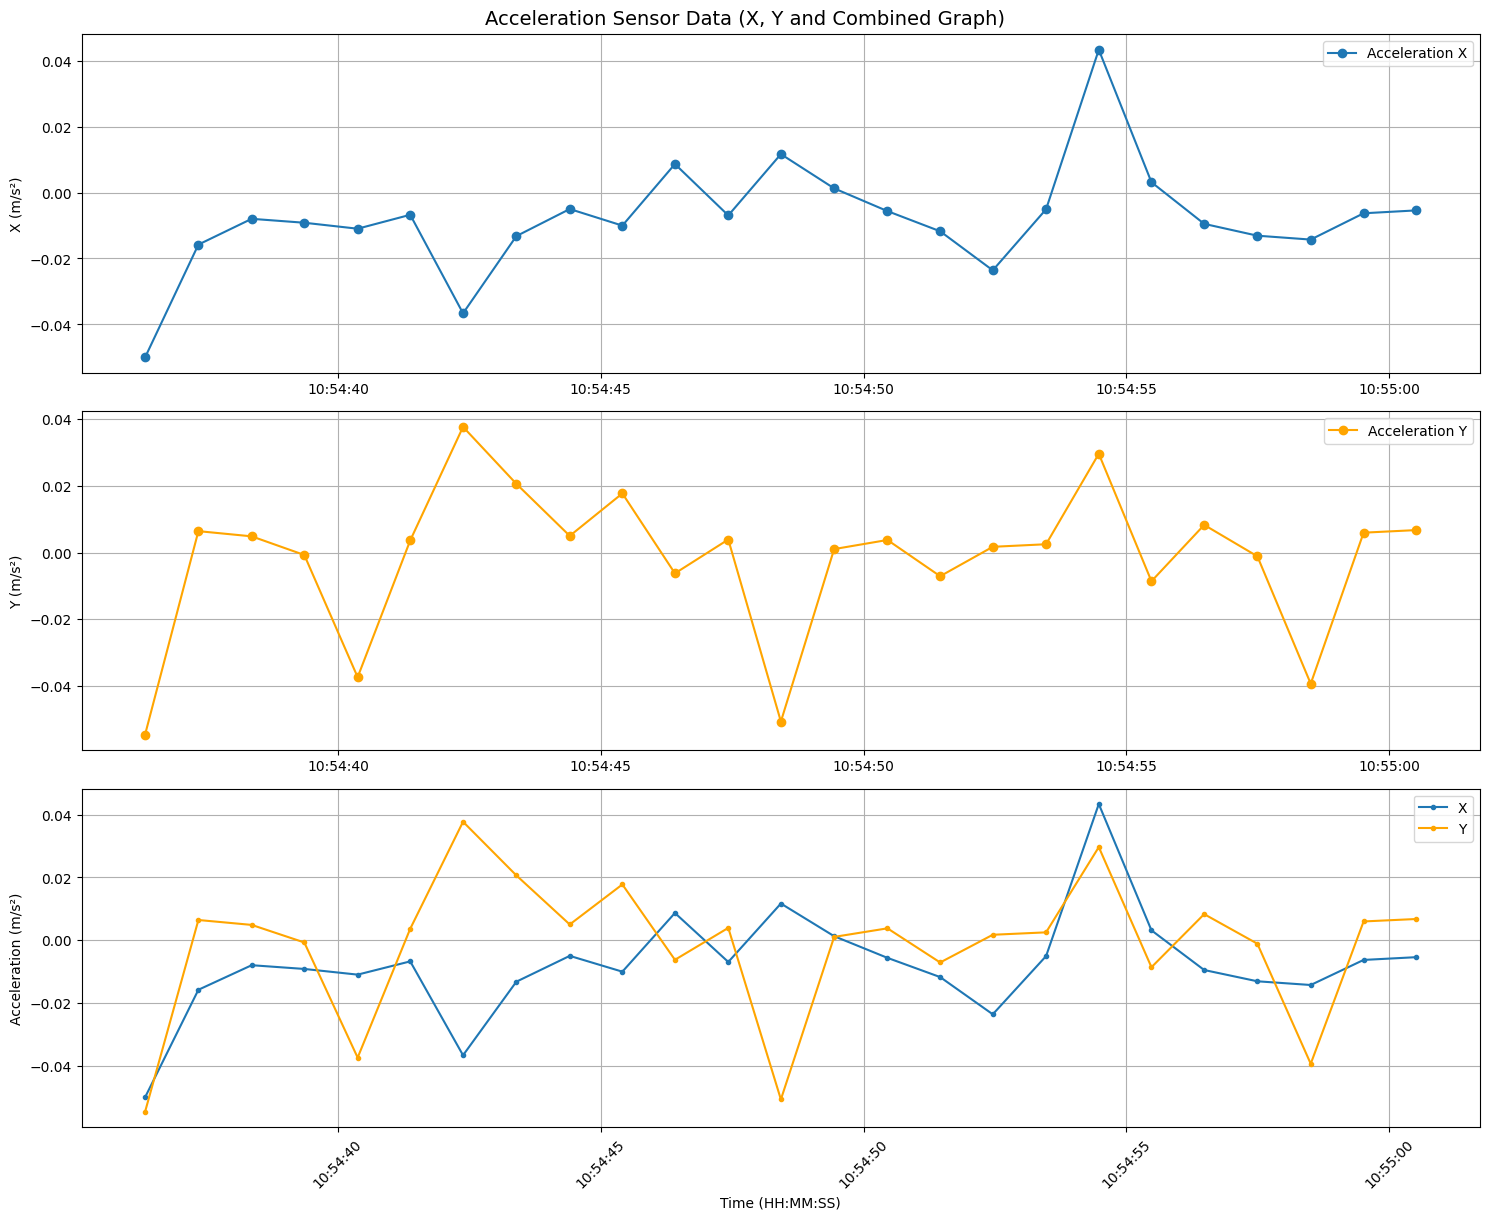

In [4]:
plt.figure(figsize=(15, 12))  # ‡∏Ç‡∏¢‡∏≤‡∏¢‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏π‡∏á‡∏≠‡∏µ‡∏Å‡∏´‡∏ô‡πà‡∏≠‡∏¢

# ‡∏Å‡∏£‡∏≤‡∏ü 1: acc_x
plt.subplot(3, 1, 1)
plt.plot(df['timestamp'], df['acc_x'], label='Acceleration X', marker='o')
plt.ylabel('X (m/s¬≤)')
plt.legend()
plt.grid()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# ‡∏Å‡∏£‡∏≤‡∏ü 2: acc_y
plt.subplot(3, 1, 2)
plt.plot(df['timestamp'], df['acc_y'], label='Acceleration Y', color='orange', marker='o')
plt.ylabel('Y (m/s¬≤)')
plt.legend()
plt.grid()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))


# ‡∏Å‡∏£‡∏≤‡∏ü 4: ‡∏£‡∏ß‡∏° acc_x
plt.subplot(3, 1, 3)
plt.plot(df['timestamp'], df['acc_x'], label='X', marker='.')
plt.plot(df['timestamp'], df['acc_y'], label='Y', marker='.', color='orange')
plt.xlabel('Time (HH:MM:SS)')
plt.ylabel('Acceleration (m/s¬≤)')
plt.legend()
plt.grid()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# ‡∏ï‡∏±‡πâ‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Å‡∏£‡∏≤‡∏ü‡∏£‡∏ß‡∏°
plt.suptitle('Acceleration Sensor Data (X, Y and Combined Graph)', fontsize=14)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## After Filtering

# **Gyroscope Sensor**

## Before Filtering

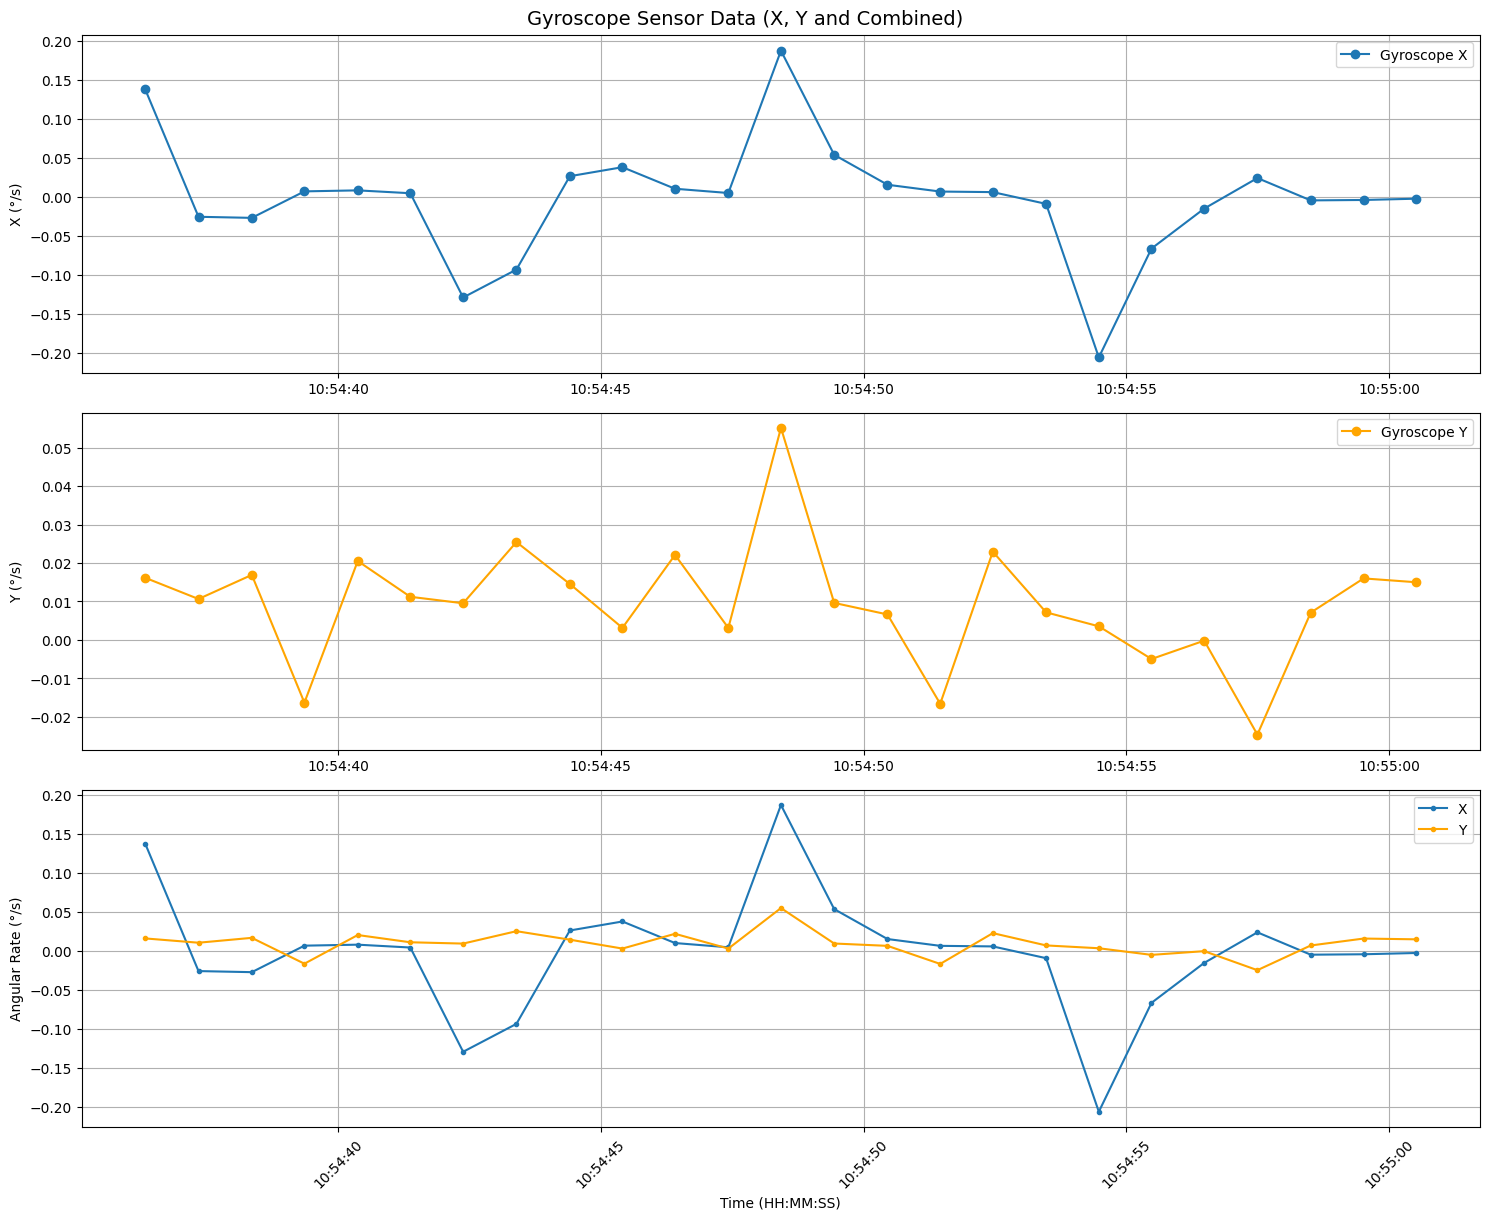

In [5]:

plt.figure(figsize=(15, 12)) 

# Gyro X
plt.subplot(3, 1, 1)
plt.plot(df['timestamp'], df['gyro_x'], label='Gyroscope X', marker='o')
plt.ylabel('X (¬∞/s)')
plt.legend()
plt.grid()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Gyro Y
plt.subplot(3, 1, 2)
plt.plot(df['timestamp'], df['gyro_y'], label='Gyroscope Y', color='orange', marker='o')
plt.ylabel('Y (¬∞/s)')
plt.legend()
plt.grid()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))


plt.subplot(3, 1, 3)
plt.plot(df['timestamp'], df['gyro_x'], label='X', marker='.', linestyle='-')
plt.plot(df['timestamp'], df['gyro_y'], label='Y', marker='.', linestyle='-', color='orange')
plt.xlabel('Time (HH:MM:SS)')
plt.ylabel('Angular Rate (¬∞/s)')
plt.legend()
plt.grid()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Title ‡πÅ‡∏•‡∏∞ layout
plt.suptitle('Gyroscope Sensor Data (X, Y and Combined)', fontsize=14)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## After Filtering

# **Distance Sensor**

In [6]:
df = pd.read_csv("combined_sensor_data.csv")
df = df[df["tof"] <= 400]
df

timestamp_iso  tof  gimbal_pitch_angle  gimbal_yaw_angle  \
0   2025-07-15T10:35:36.049924  164                 NaN               NaN   
1   2025-07-15T10:35:36.232909  164                -1.2              85.2   
2   2025-07-15T10:35:36.249327  167                -1.2              85.2   
3   2025-07-15T10:35:36.431410  167                -1.1              79.3   
4   2025-07-15T10:35:36.447670  177                -1.1              79.3   
..                         ...  ...                 ...               ...   
63  2025-07-15T10:35:42.583990  199                -0.5             -90.4   
64  2025-07-15T10:35:42.583990  199                -0.5             -90.4   
65  2025-07-15T10:35:42.763894  197                -0.6             -90.4   
66  2025-07-15T10:35:42.763894  197                -0.6             -90.4   
67  2025-07-15T10:35:42.997423  197                -0.5             -90.4   

    gimbal_pitch_ground_angle  gimbal_yaw_ground_angle  
0                         NaN                      NaN  
1                         0.0                     86.5  
2                         0.0                     86.5  
3                         0.0                     80.5  
4                         0.0                     80.5  
..                        ...                      ...  
63                        0.0                    -88.7  
64                        0.0                    -88.7  
65                        0.0                    -88.7  
66                        0.0                    -88.7  
67                        0.0                    -88.7  

[68 rows x 6 columns]

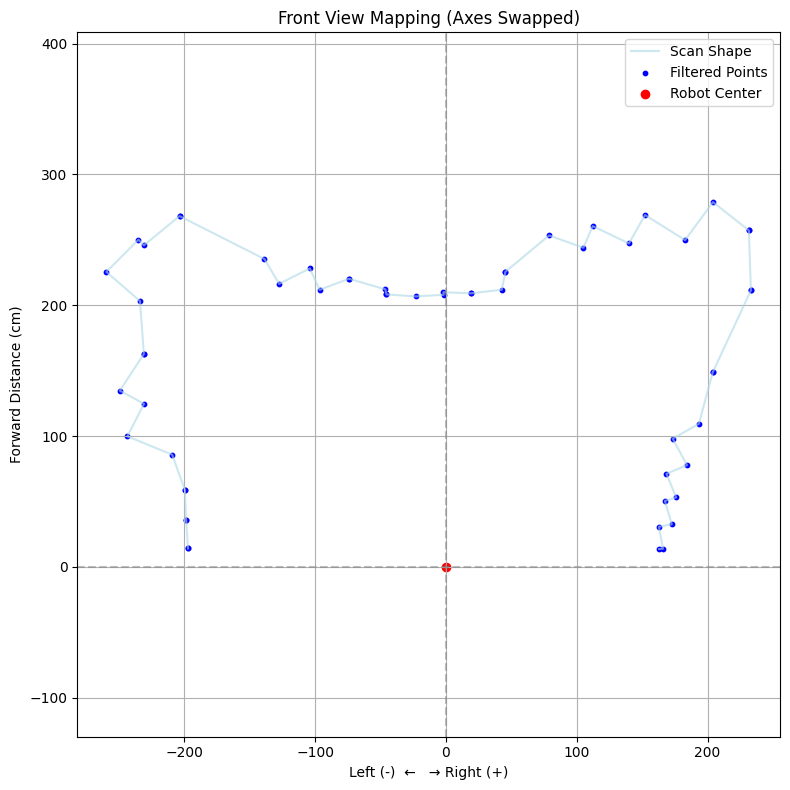

In [9]:
df_clean = df.dropna(subset=['tof', 'gimbal_yaw_angle'])

# ‡∏à‡∏≥‡∏Å‡∏±‡∏î‡∏°‡∏∏‡∏°‡πÉ‡∏´‡πâ‡πÄ‡∏â‡∏û‡∏≤‡∏∞ -90¬∞ ‡∏ñ‡∏∂‡∏á +90¬∞
df_filtered = df_clean[(df_clean['gimbal_yaw_angle'] >= -90) & (df_clean['gimbal_yaw_angle'] <= 90)]

# ---------------------------
# üîç ‡∏Å‡∏£‡∏≠‡∏á Outliers ‡∏à‡∏≤‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ToF ‡∏î‡πâ‡∏ß‡∏¢ IQR
q1 = df_filtered['tof'].quantile(0.25)
q3 = df_filtered['tof'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_no_outliers = df_filtered[
    (df_filtered['tof'] >= lower_bound) &
    (df_filtered['tof'] <= upper_bound)
]

yaw_deg = df_no_outliers['gimbal_yaw_angle'].values
yaw_rad = np.radians(yaw_deg)
tof = df_no_outliers['tof'].values

sensor_offset = 8  # cm ‡∏à‡∏≤‡∏Å‡∏à‡∏∏‡∏î‡∏´‡∏°‡∏∏‡∏ô‡∏ñ‡∏∂‡∏á‡πÄ‡∏ã‡∏ô‡πÄ‡∏ã‡∏≠‡∏£‡πå

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏£‡∏∞‡∏¢‡∏∞‡∏à‡∏≤‡∏Å‡∏à‡∏∏‡∏î‡∏´‡∏°‡∏∏‡∏ô (‡∏î‡πâ‡∏ß‡∏¢ cosine law)
total_distance = np.sqrt(
    tof**2 + sensor_offset**2 - 2 * tof * sensor_offset * np.cos(yaw_rad)
)

# ---------------------------
# üìê ‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô‡∏û‡∏¥‡∏Å‡∏±‡∏î XY:
#   - ‡πÅ‡∏Å‡∏ô X = ‡∏î‡πâ‡∏≤‡∏ô‡∏´‡∏ô‡πâ‡∏≤ (Forward)
#   - ‡πÅ‡∏Å‡∏ô Y = ‡∏ã‡πâ‡∏≤‡∏¢/‡∏Ç‡∏ß‡∏≤
new_x = total_distance * np.cos(yaw_rad)
new_y = total_distance * np.sin(yaw_rad)

# ---------------------------
# ‚öôÔ∏è ‡∏Ñ‡πà‡∏≤‡∏Ñ‡∏á‡∏ó‡∏µ‡πà
plt.figure(figsize=(8, 8))

# ‡∏™‡∏•‡∏±‡∏ö‡∏•‡∏≥‡∏î‡∏±‡∏ö‡∏û‡∏¥‡∏Å‡∏±‡∏î‡πÄ‡∏õ‡πá‡∏ô (new_y, new_x)
plt.plot(new_y, new_x, color='lightblue', alpha=0.6, label='Scan Shape')
plt.scatter(new_y, new_x, c='blue', s=10, label='Filtered Points')

# ‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á‡∏´‡∏∏‡πà‡∏ô (0,0) ‡∏à‡∏∞‡∏™‡∏•‡∏±‡∏ö‡∏ï‡∏≤‡∏°‡πÅ‡∏Å‡∏ô‡πÉ‡∏´‡∏°‡πà
plt.scatter(0, 0, c='red', label='Robot Center')

# ‡πÄ‡∏™‡πâ‡∏ô‡πÅ‡∏Å‡∏ô
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)

# ‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤‡πÅ‡∏Å‡∏ô‡πÉ‡∏´‡∏°‡πà
plt.title("Front View Mapping (Axes Swapped)")
plt.xlabel("Left (-)  ‚Üê   ‚Üí Right (+)")   # new_y ‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏Å‡∏ô X
plt.ylabel("Forward Distance (cm)")        # new_x ‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏Å‡∏ô Y
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()